# Question 1



## (a). What are the major similarities and di erences between the cost functions J (ω) and J˜(ω)

  




###Smilarities:

*   Both functions are used as metrics to measure the accuracy of the continuous variables.
*   They both show the average model prediction error in the case where there is interest in the variable units.

*    They also both have a scale range of  0 to ∞ and are usually indifferent to the error directions.






 

### Differences:
 
* Since J (ω) function relates to MSE, it gives relatively higher accuracy to large errors as compared to J˜(ω).
*  Therefore, J (ω) is more useful when dealing with large errors which are undesirable.


*    The results of J (ω) will always be above or equal to the result of J˜(ω) and in any case where the magnitude of the error is the same then J (ω)= J˜(ω). 
*    Another difference shown by Villalobos, (2019), is when the error of prediction comes from a single sample test.


*   In terms of upper bound J (ω) usually increases more than J˜(ω) as the sample size test is increasing.
*   J (ω) does not usually describe the average error alone and therefore usually more difficult to understand as opposed to J˜(ω) which can describe the average error alone.








##(b). Under what circumstances, would it be more appropriate to use each of the above cost functions?



J (ω) is most useful when the data has a lot of outliers that are too high or too low values. This function is much useful in a case where there are large errors that are affecting the performance of the model. J˜(ω) is useful in a scenario where continuous variable data is involved to ascertain the performance of the model. 


# Question 2
**Collinearity:** Suppose you are conducting a linear regression with multiple features. You find out that some of the features you have considered in your problem are highly correlated.




##(a) How will the result of the regression be a ected? What would happen to the coe cients of linear regression?


In the case of multicollinearity, the coefficient becomes so much detective to any small changes done on it.  The multicollinearity also minimizes the preciseness of the projected coefficients, this reduces the statistical power of the linear regression. It also leads to mistrust of p-values that will prove statistical significance. This means interpreting the coefficient will be very difficult and the ability of the model to show independent variables that are statistically significant will be minimized. Multicollinearity makes the result of the model significantly fluctuate because a change in one variable would definitely lead to a change in the other.

##(b) How will you handle the linear regression in this case?


The problem of multicollinearity can be reduced by centering the variables. It involves standardizing the variables where the mean is subtracted. In articulating this approach the process starts with calculating the mean of every continuous independent variable, and then it is subtracted from all available variable values. The centered variable model is efficient in conducting this process because the coefficient interpretation remains the same and doesn’t change. Some other methods of reducing this problem are; removing the highly correlated variables, combining the independent variables through addition, performing the principal component analysis or partial least squares regression, and also linear least squares regression.

# Question 3

###**Occam’s Razor:** Occam’s razor is a philosophical principle about simplicity that was for¬mulated in 13th-century by the theologian William of Ockham. Do some research and very briefly explain what Occam’s razor states. How can Occam’s razor be practiced in the context of statistical learning? Is there any relationship between Occam’s razor and notions of bias and/or variance in machine learning?

Occam’s razor states that for a phenomenon that requires solutions and has two competing ideas, the simpler one should be chosen. This means that, with everything else being equal, simpler solutions to a scenario are to be preferred or considered instead of more complex ones. Ockham stated that “entities must not be multiplied beyond necessity.



In the context of statistical learning, Occam’s razor is justified by probability theory. Occam’s razor directly impacts the theory of probability. In direction of assumption, more theories entail a lot of assumptions which shows the greater probability of the assumptions being incorrect, thus, the more inaccuracy the entire probability is the more the study becomes wrong. 



The notion of bias and/or variance in machine learning is well linked with Occam’s Razor as it is a universal optimization problem. In a scenario where a model is to be selected to solve a problem, the model which is complex enough that avoids underfitting and also very simple that it avoids overfitting is chosen. Therefore, when selecting the best model, the simpler model will only be selected if its generalization error is equal to or below the complex model.



**References:**
Mavuduru, A. (2022, August 9). What Occam’s Razor Means in Machine Learning. Medium. https://towardsdatascience.com/what-occams-razor-means-in-machine-learning-53f07effc97c


In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from sklearn.model_selection import train_test_split

#Question 4

## (a).Perform a correlation analysis, and identify the most signi cant features for the target variable AverageGateArrivalDelay.

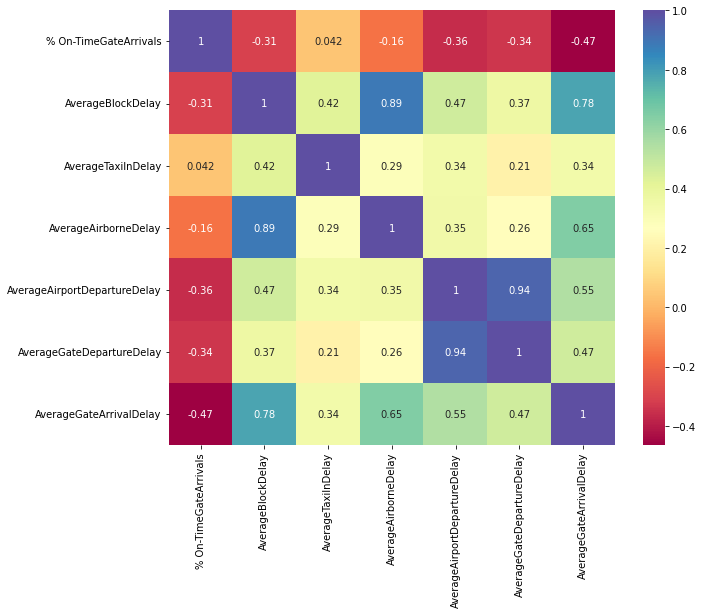

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Homeworks/GateArrivalDelay.csv')
plt.figure(figsize = (10,8))
corr=df.corr()
sns.heatmap(corr, cmap = 'Spectral', annot= True);

From the correlation matrix shown in the figure, it is observed that variables that are strongly correlated with the average gate arrival delay are average block delay (correl=0.78), average airborne delay (correl=0.65) and average airport departure delay (correl=0.55). Only these variables are used as the indipendent variables

## (b) Split your dataset into train and test subsets (test size=0.3).

In [3]:
# Splitting the data into training and validation set
y = df['AverageGateArrivalDelay'] 
X = df.drop(['Date_Time','AverageGateArrivalDelay','% On-TimeGateArrivals','AverageTaxiInDelay','AverageGateDepartureDelay'],axis=1) # Independet variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

## (c) Perform linear regression on the identi ed features and predict the target.

In [4]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [5]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [6]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,0.107073,0.107073
1,theta_1,AverageBlockDelay,1.826780,1.826780
2,theta_2,AverageAirborneDelay,-0.564761,-0.564761
3,theta_3,AverageAirportDepartureDelay,0.234206,0.234206


## (d) Specify the R2-score for both train and test subsets.

In [7]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  112.06659412466564
R square obtain for normal equation method is : 0.6899330669481494


In [8]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_train)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_train)

# R_square
R_square_sk = lin_reg.score(X_train,y_train)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  86.27438631433075
R square obtain for scikit learn library is : 0.629448136314647


## (e) How do you assess the performance of the model? Do you observe signs of high bias? Do you observe signs of high variance?


The performance of the model is assessed by coefficient of determinant R^2. The signs of high variance is observed from by interpreting MSE. From the output, the model explains 68.99% of the variance in the dependent variables for testing dataset and 86.27 for the training set. 

## (f) Try to implement the linear regression using the exact formula we found in the lecture. Is the exact result in agreement with your result obtained above?

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)
r_sq = model.score(X_train,y_train)
print(f"coefficient of determination for training set: {r_sq}")


coefficient of determination for training set: 0.629448136314647


**The coefficient of determinant is slightly different**

##(g) In this part, you will perform a quadratic regression analysis. To do this, proceed as follows:

In [10]:
# i. Rename the features. Call the features x1, x2, ...
x1=df['AverageBlockDelay']
x2=df['AverageAirborneDelay']
x3=df['AverageAirportDepartureDelay']

In [11]:
#Defining monomial function
#Python function to automatically construction monomial to the third power

def mon(x):
    p1=x
    p2=x**2
    out1=pd.DataFrame([p1,p2],index=['p1','p2'])
    out=out1.T
    return out
#Defining quadratic regression variables 
x1mon=mon(x1)
x2mon=mon(x2)
x3mon=mon(x3)
i11=x1mon['p1']
i12=x1mon['p2']
i21=x2mon['p1']
i22=x2mon['p2']
i31=x3mon['p1']
i32=x3mon['p2']
out2=pd.DataFrame([i11,i12,i21,i22,i31,i32],index=['AverageBlockDelay','AverageBlockDelay^2','AverageAirborneDelay','AverageAirborneDelay^2','AverageAirportDepartureDelay','AverageAirportDepartureDelay^2'])
xq=out2.T
xq

,AverageBlockDelay,AverageBlockDelay^2,AverageAirborneDelay,AverageAirborneDelay^2,AverageAirportDepartureDelay,AverageAirportDepartureDelay^2
0,7.70,59.2900,0.60,0.3600,13.67,186.8689
1,0.91,0.8281,0.00,0.0000,13.17,173.4489
2,1.00,1.0000,0.00,0.0000,25.50,650.2500
3,1.50,2.2500,3.00,9.0000,26.75,715.5625
4,0.64,0.4096,1.27,1.6129,15.00,225.0000
...,...,...,...,...,...,...
2202,16.29,265.3641,1.81,3.2761,32.00,1024.0000
2203,10.29,105.8841,3.00,9.0000,71.17,5065.1689
2204,4.59,21.0681,2.18,4.7524,11.83,139.9489
2205,2.55,6.5025,2.14,4.5796,25.75,663.0625


In [14]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xq,y,test_size=0.3,random_state=23)

In [15]:
# R-square for training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train1,y_train1)
r_sq = model.score(X_train1,y_train1)
print(f"coefficient of determination for training set: {r_sq}")

coefficient of determination for training set: 0.6416476286202897


In [16]:
# R-square for testing set
R_sqs = model.score(X_test1,y_test1)
print(f"coefficient of determination for testing set: {R_sqs}")

coefficient of determination for testing set: 0.7027936972866281


### (v). Present your assessment of the performance of the quadratic regression.

**Assessment of Bias:**
There no signs of high bias from the results of the above R2_scores of the quadratic regression model.


**Assessment of Variance:**
The quadratic regression model has lower R2_score for both the training and testing subsets compared to the linear regresssion model. But there no signs of high variance.


# Question 5


##(a) Pick at least 50 sample points from the interval [0; 5]. For the sample points, add some random noise - chosen from a normal distribution - to the target y = f(x). Record the values of x and y in a data-frame.

In [17]:
#Defining the function
data = pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Homeworks/Data.csv')

In [18]:
data.head()
# Adding random noise 
x=data['x']
f=data['f']
noise=np. random. normal(0, .1, f. shape)# Defining random noise

In [19]:
y=noise+f# adding noise to the function


## (b) Construct all monomials of x up to power 11.

In [20]:
x2=x**2
x3=x**3
x4=x**4
x5=x**5
x6=x**6
x7=x**7
x8=x**8
x9=x**9
x10=x**10
x11=x**11
xq5=pd.DataFrame([x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11],index=['x','x^2','x^3','x^4','x^5','x^6','x^7','x^8','x9','x^10','x^11'])
xq5=xq5.T

## (c) Perform the ordinary polynomial regression (up to order 11) to predict y. Present the coeffcients of regression for all monomials.

In [21]:
model = LinearRegression()
model.fit(xq5,y)
r_sq = model.score(xq5,y)
print(f"coefficient of determination for training set: {r_sq}")
model.coef_

coefficient of determination for training set: 0.995291150987987


array([ 1.55521963e+00, -1.02260613e+01,  2.72928376e+01, -3.89682727e+01,
        3.28825473e+01, -1.77139965e+01,  6.25477693e+00, -1.43739131e+00,
        2.06684303e-01, -1.68728828e-02,  5.96678438e-04])

## (d) Repeat part (c) with the Ridge regression. What value would you consider for the penalty factor? Present the coe cients of regression for all monomials and compare them to coe cients obtained in part (c).

In [22]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(xq5, y)
r_sq = model.score(xq5,y)
print(f"coefficient of determination for training set: {r_sq}")
model.coef_

coefficient of determination for training set: 0.9952274242532811


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.12496e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


array([-1.25129018e-02, -2.82745223e-02, -6.58217671e-02, -9.48685530e-02,
       -7.44305683e-02,  3.43723818e-03,  5.61795795e-02, -2.94648996e-02,
        6.40267398e-03, -6.58822180e-04,  2.65401872e-05])

## (e) Repeat part (c) with the LASSO regression. What value would you consider for the penalty factor? Present the coe cients of regression for all monomials and compare them to coe cients obtained in parts (c) and (d).

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(xq5,y)
r_sq = lasso.score(xq5,y)
print(f"coefficient of determination for training set: {r_sq}")
lasso.coef_

coefficient of determination for training set: 0.9440577689216677


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.577e+01, tolerance: 5.155e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([-0.00000000e+00, -0.00000000e+00, -1.71614305e-01, -2.29975526e-02,
        9.06472452e-03,  1.48773525e-03,  8.17648546e-05, -4.48187956e-06,
       -3.01061875e-06, -7.61260884e-07, -1.57889488e-07])

#f and g
From the the coefficient output, it is observed that the most important monomial is the first monomial 